In [1]:
#Ignore 'Future Warnings'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [3]:
seed=42

In [4]:
df=pd.read_excel ('../data/1a_offset.xlsx',index_col=0,na_values=['..'])
year_dummies = pd.get_dummies(df.year, prefix='year').iloc[:,1:]
region_dummies = pd.get_dummies(df.region, prefix='region').iloc[:,1:]
country_dummies = pd.get_dummies(df.ccode, prefix='country: ').iloc[:,1:]

df = pd.concat([df, year_dummies, region_dummies, country_dummies], axis = 1)

In [5]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=seed )
#print('Train/Test Split Complete')

#Impliment SMOTE
sm = SMOTE(random_state = seed) 
X_train, Y_train = sm.fit_sample(X_train, Y_train)
#print('oversampling complete')

pca = PCA(.8)
principalComponents = pca.fit_transform(X_train)
print(pca.n_components_)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

163


In [13]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=4, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=.04, min_weight_fraction_leaf=0.0,
 n_estimators=64, n_jobs=1, oob_score=False,
 verbose=0, warm_start=False, random_state=seed)

In [14]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

0.8807339449541285
0.8055944055944056
0.8882636655948553


In [17]:
rf = RandomForestClassifier(random_state=seed)

In [18]:
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
print(recall_score(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

0.8287461773700305
0.8224582701062215
0.9059485530546624


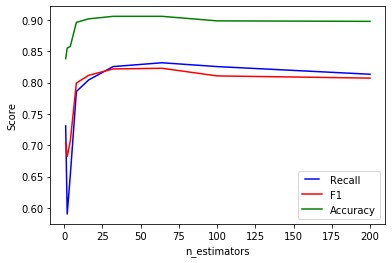

In [8]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
recall_results = []
f1_results = []
accuracy_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(n_estimators, recall_results, 'b', label='Recall')
line2, = plt.plot(n_estimators, f1_results, 'r', label='F1')
line3, = plt.plot(n_estimators, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('n_estimators')
plt.show()

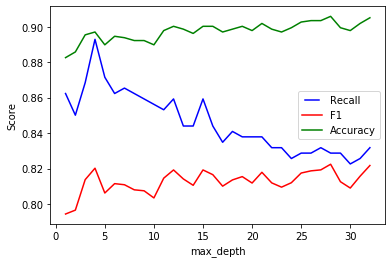

In [11]:
recall_results = []
f1_results = []
accuracy_results = []

max_depths = np.linspace(1, 32, 32, endpoint=True)

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(max_depths, recall_results, 'b', label='Recall')
line2, = plt.plot(max_depths, f1_results, 'r', label='F1')
line3, = plt.plot(max_depths, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_depth')
plt.show()

In [12]:
print(recall_results)

[0.8623853211009175, 0.8501529051987767, 0.8685015290519877, 0.8929663608562691, 0.8715596330275229, 0.8623853211009175, 0.8654434250764526, 0.8623853211009175, 0.8593272171253823, 0.8562691131498471, 0.8532110091743119, 0.8593272171253823, 0.8440366972477065, 0.8440366972477065, 0.8593272171253823, 0.8440366972477065, 0.8348623853211009, 0.8409785932721713, 0.8379204892966361, 0.8379204892966361, 0.8379204892966361, 0.8318042813455657, 0.8318042813455657, 0.8256880733944955, 0.8287461773700305, 0.8287461773700305, 0.8318042813455657, 0.8287461773700305, 0.8287461773700305, 0.8226299694189603, 0.8256880733944955, 0.8318042813455657]


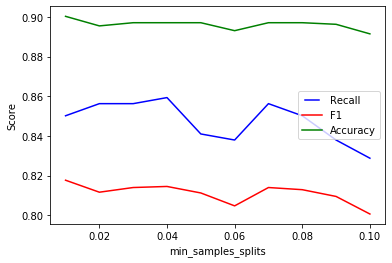

In [40]:
recall_results = []
f1_results = []
accuracy_results = []

min_samples_splits = np.linspace(.01, .1, 10, endpoint=True)

for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(min_samples_splits, recall_results, 'b', label='Recall')
line2, = plt.plot(min_samples_splits, f1_results, 'r', label='F1')
line3, = plt.plot(min_samples_splits, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_samples_splits')
plt.show()

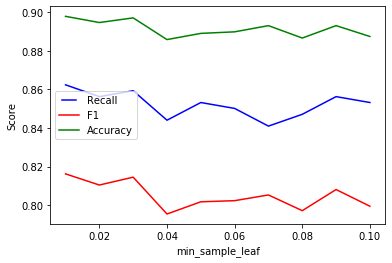

In [43]:
recall_results = []
f1_results = []
accuracy_results = []

min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)

for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(min_samples_leafs, recall_results, 'b', label='Recall')
line2, = plt.plot(min_samples_leafs, f1_results, 'r', label='F1')
line3, = plt.plot(min_samples_leafs, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('min_sample_leaf')
plt.show()




  0%|                                                                                           | 0/49 [00:00<?, ?it/s]


  2%|█▋                                                                                 | 1/49 [00:00<00:28,  1.70it/s]


  4%|███▍                                                                               | 2/49 [00:01<00:31,  1.51it/s]


  6%|█████                                                                              | 3/49 [00:02<00:38,  1.18it/s]


  8%|██████▊                                                                            | 4/49 [00:04<00:50,  1.12s/it]


 10%|████████▍                                                                          | 5/49 [00:06<01:01,  1.40s/it]


 12%|██████████▏                                                                        | 6/49 [00:08<01:12,  1.69s/it]


 14%|███████████▊                                                                       | 7/49 [00:11<01:21,  1.95s/it]


 16%|█████████████▌  

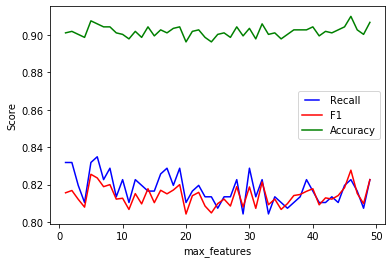

In [14]:
recall_results = []
f1_results = []
accuracy_results = []

max_features = list(range(1,50))

for max_feature in tqdm(max_features):
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    recall=recall_score(Y_test, Y_pred)
    recall_results.append(recall)
    f1=f1_score(Y_test, Y_pred)
    f1_results.append(f1)
    accuracy=accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

line1, = plt.plot(max_features, recall_results, 'b', label='Recall')
line2, = plt.plot(max_features, f1_results, 'r', label='F1')
line3, = plt.plot(max_features, accuracy_results, 'g', label='Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('max_features')
plt.show()